In [145]:
%pip install basemap

Note: you may need to restart the kernel to use updated packages.Collecting basemap-data<1.4,>=1.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.



  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=7c9e61c8ef102252035603975d131475dfe958980f67ff34b1f94cf1a031e578
  Stored in directory: c:\users\yvtonder\appdata\local\pip\cache\wheels\6a\73\a7\3dc684169ab99e26d1e9e25f2a939ea1886209f1b4087b4131
Successfully built pyshp
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0


In [169]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [39]:
%pip install basemap-data-hires

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

from statsmodels.formula.api import ols
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
from mpl_toolkits.basemap import Basemap

%matplotlib inline

# Making the data frame 
df = pd.read_csv('./listings.csv')
pd.set_option('display.max_columns', None)

# Calling the head() method  
df.head()

id                            listing_url     scrape_id last_scraped  \
0  12147973  https://www.airbnb.com/rooms/12147973  2.020000e+13   2016/09/07   
1   3075044   https://www.airbnb.com/rooms/3075044  2.020000e+13   2016/09/07   
2      6976      https://www.airbnb.com/rooms/6976  2.020000e+13   2016/09/07   
3   1436513   https://www.airbnb.com/rooms/1436513  2.020000e+13   2016/09/07   
4   7651065   https://www.airbnb.com/rooms/7651065  2.020000e+13   2016/09/07   

                                            name  \
0                     Sunny Bungalow in the City   
1              Charming room in pet friendly apt   
2               Mexican Folk Art Haven in Boston   
3  Spacious Sunny Bedroom Suite in Historic Home   
4                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  \
0  Roslindale is quiet, convenient and friendly. ...   
1  The room is in Roslindale, a diverse and prima...   
2  The LOCATION: Roslindale is a safe and diverse...   
3  Roslindale is a lovely little neighborhood loc...   
4  I love the proximity to downtown, the neighbor...   

                                               notes  \
0                                                NaN   
1  If you don't have a US cell phone, you can tex...   
2  I am in a scenic part of Boston with a couple ...   
3  Please be mindful of the property as it is old...   
4  I have one roommate who lives on the lower lev...   

                                             transit  \
0  The bus stop is 2 blocks away, and frequent. B...   
1  Plenty of safe street parking. Bus stops a few...   
2  PUBLIC TRANSPORTATION: From the house, quick p...   
3  There are buses that stop right in front of th...   
4  From Logan Airport  and South Station you have...   

                                              access  \
0  You will have access to 2 bedrooms, a living r...   
1  Apt has one more bedroom (which I use) and lar...   
2  I am living in the apartment during your stay,...   
3  The basement has a washer dryer and gym area. ...   
4  You will have access to the front and side por...   

                                         interaction  \
0                                                NaN   
1  If I am at home, I am likely working in my hom...   
2  ABOUT ME: I'm a laid-back, friendly, unmarried...   
3  We do live in the house therefore might be som...   
4  I love my city and really enjoy sharing it wit...   

                                         house_rules  \
0  Clean up and treat the home the way you'd like...   
1  Pet friendly but please confirm with me if the...   
2  I encourage you to use my kitchen, cooking and...   
3                                             #NAME?   
4  Please no smoking in the house, porch or on th...   

                                       thumbnail_url  \


In [2]:
df.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   756
Length: 95, dtype: int64

<AxesSubplot:xlabel='index'>

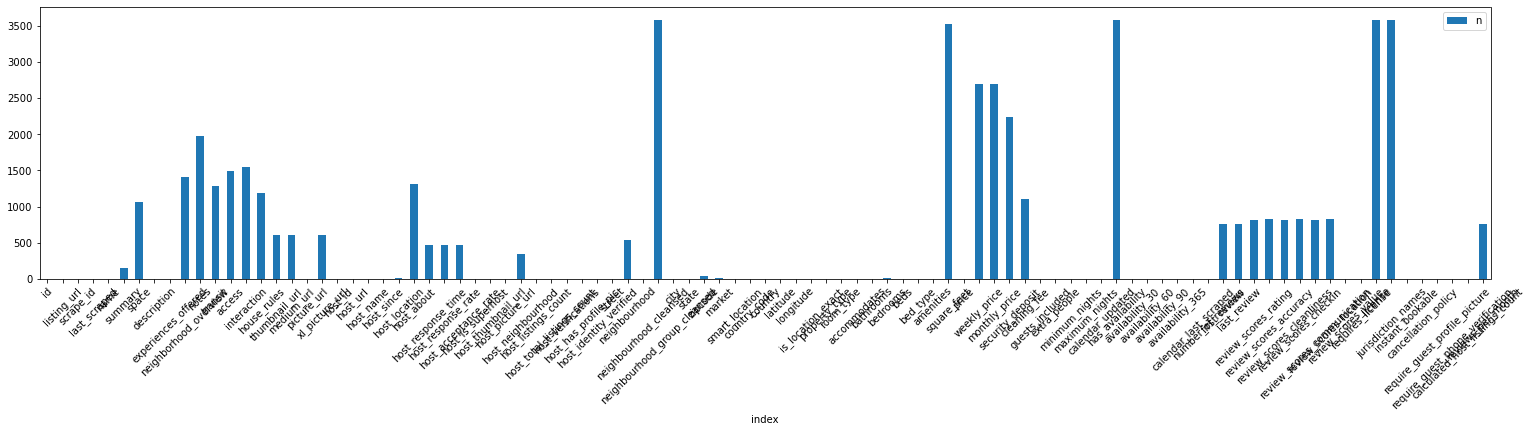

In [3]:
fig_dims = (26, 5)
df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45, figsize = fig_dims)

In [4]:
# The nunmber of rows and columns is determined (before dropping any rows or removing any data).
num_rows_total = print("The total number of rows are:", df.shape[0])
num_cols_total = print("The total number of columns are:", df.shape[1])

The total number of rows are: 3585
The total number of columns are: 95


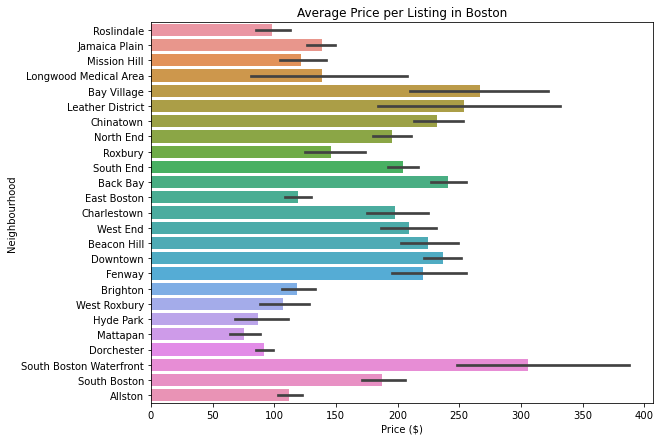

In [5]:
#  A horizontal bar chart will be displayed showing the average price ($) (nightly rate) of a listing based on location (neighborhoods in Boston, MA); The graph will have a title,
#  x-axis title and y-axis title; The black overlay line on the bars is the error bars for the price.
fig_dims = (9, 7)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(y = 'neighbourhood_cleansed', x = 'price', data = df, orient = "h", ax = ax)
plt.xlabel('Price ($)')
plt.ylabel('Neighbourhood')
plt.title("Average Price per Listing in Boston")
plt.show()

In [6]:
#  Dropping the rows from the data frame where the values for the bedroom is equal to zero.
df.drop(df.index[df['bedrooms'] == 0], inplace = True)

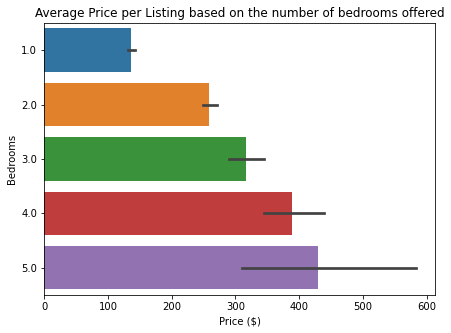

In [7]:
#  A horizontal bar chart will be displayed showing the average price ($) (nightly rate) of a listing based on the number of bedrooms the home offers; The graph will have a title,
#  x-axis title and y-axis title; The black overlay line on the bars is the error bars for the price.
fig_dims = (7, 5)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(y = 'bedrooms', x = 'price', data = df, orient = "h", ax = ax)
plt.xlabel('Price ($)')
plt.ylabel('Bedrooms')
plt.title("Average Price per Listing based on the number of bedrooms offered")
plt.show()

In [8]:
#  Creating a new data frame that we can change and not change the original data frame.
#  df is the original df
#  df1 rows were dropped where bedroom != 3
df1 = df[['id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'beds', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
          'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_value', 'calculated_host_listings_count',
         'scrape_id', 'host_response_rate', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'square_feet', 'weekly_price',
          'monthly_price', 'security_deposit', 'cleaning_fee', 'has_availability', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
          'review_scores_communication', 'review_scores_location', 'license', 'jurisdiction_names', 'reviews_per_month', 'listing_url', 'last_scraped', 'name', 'summary', 'space',
          'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url',
          'xl_picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
          'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
          'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'amenities', 'calendar_updated', 'calendar_last_scraped',
          'first_review', 'last_review', 'requires_license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']].copy()

df1.shape

(3298, 95)

In [9]:
#  Dropping the rows from the data frame where the values for the bedroom is not equal to 3.
#  df is the original df
#  df1 rows were dropped where bedroom != 3
df1.drop(df1.index[df1['bedrooms'] != 3], inplace = True)
df1[['bedrooms']].head()

bedrooms
23       3.0
37       3.0
38       3.0
55       3.0
96       3.0

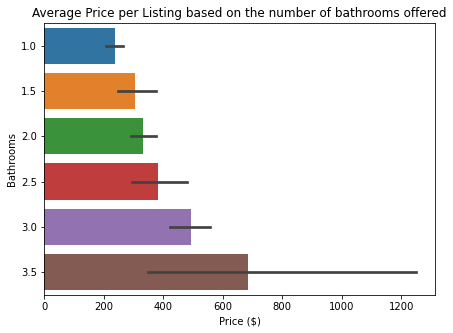

In [10]:
#  A horizontal bar chart will be displayed showing the average price ($) (nightly rate) of a listing based on the number of bathrooms the home offers; The graph will have a title,
#  x-axis title and y-axis title; The black overlay line on the bars is the error bars for the price.
#  df is the original df
#  df1 rows were dropped where bedroom != 3
fig_dims = (7, 5)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(y = 'bathrooms', x = 'price', data = df1, orient = "h", ax = ax)
plt.xlabel('Price ($)')
plt.ylabel('Bathrooms')
plt.title("Average Price per Listing based on the number of bathrooms offered")
plt.show()

In [11]:
# The nunmber of rows and columns is determined (after dropping rows).
#  df is the original df
#  df1 rows were dropped where bedroom != 3
num_rows_total = print("The total number of rows are:", df.shape[0])
num_cols_total = print("The total number of columns are:", df.shape[1])

The total number of rows are: 3298
The total number of columns are: 95


In [12]:
# Listing all the column names.
#  df is the original df
#  df1 rows were dropped where bedroom != 3
for col in df.columns:
    print(col)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
cal

In [13]:
#  Listing what variable type each column is so we can see which columns are numerical and which columns are categorical.
#  df is the original df
#  df1 rows were dropped where bedroom != 3
print(df.columns.to_series().groupby(df.dtypes).groups)

{int64: ['id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'beds', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_value', 'calculated_host_listings_count'], float64: ['scrape_id', 'host_response_rate', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'has_availability', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'license', 'jurisdiction_names', 'reviews_per_month'], object: ['listing_url', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 

In [14]:
#  Here we are using the Z-score method to determine which data point are outliers - This code determines the z-score of each row.
#  df is the original df
#  df1 rows were dropped where bedroom != 3
z=np.abs(stats.zscore(df.price))
print(z)

0       0.483679
1       0.719043
2       0.719043
3       0.654031
4       0.628026
          ...   
3580    0.693038
3581    0.166441
3582    0.145617
3583    0.719043
3584    0.719043
Name: price, Length: 3298, dtype: float64


In [15]:
#  We are setting the threshold for the Z-value which will tell us which value is an outlier or not.
#  df is the original df
#  df1 rows were dropped where bedroom != 3
threshold = 3
print(np.where(z > 3))

(array([ 289,  382,  397,  765,  853,  964, 1013, 1035, 1140, 1164, 1173,
       1268, 1342, 1593, 1599, 1683, 1717, 1724, 1747, 1760, 1772, 1783,
       1979, 2055, 2151, 2201, 2234, 2235, 2795, 2833, 2854, 2946, 2972],
      dtype=int64),)


In [16]:
#  Just confirmig how many rows and coluns we have in the data set (rows, columns).
#  df is the original df
#  df1 rows were dropped where bedroom != 3
df.shape

(3298, 95)

In [17]:
#  Creating a new data frame where we have dropped the rows which have a z-value greater than 3.
#  df is the original df
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
df2 = df[(z < 3)]
print(df2)

            id                            listing_url     scrape_id  \
0     12147973  https://www.airbnb.com/rooms/12147973  2.020000e+13   
1      3075044   https://www.airbnb.com/rooms/3075044  2.020000e+13   
2         6976      https://www.airbnb.com/rooms/6976  2.020000e+13   
3      1436513   https://www.airbnb.com/rooms/1436513  2.020000e+13   
4      7651065   https://www.airbnb.com/rooms/7651065  2.020000e+13   
...        ...                                    ...           ...   
3580   8373729   https://www.airbnb.com/rooms/8373729  2.020000e+13   
3581  14844274  https://www.airbnb.com/rooms/14844274  2.020000e+13   
3582  14585486  https://www.airbnb.com/rooms/14585486  2.020000e+13   
3583  14603878  https://www.airbnb.com/rooms/14603878  2.020000e+13   
3584  14504422  https://www.airbnb.com/rooms/14504422  2.020000e+13   

     last_scraped                                           name  \
0      2016/09/07                     Sunny Bungalow in the City   
1      2016

In [18]:
#  Creating a subset to only house the numerical values and excluding the categorical values.
#  df is the original df
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
df3 = df2[['id', 'scrape_id', 'last_scraped', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'calculated_host_listings_count',
      'host_response_rate', 'host_acceptance_rate',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms',
       'bedrooms', 'beds', 'square_feet', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'has_availability',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'jurisdiction_names',
       'reviews_per_month']]

#  Using the head() method to get a look at what the data looks like.
df3.head()

id     scrape_id last_scraped   host_id  host_listings_count  \
0  12147973  2.020000e+13   2016/09/07  31303940                    1   
1   3075044  2.020000e+13   2016/09/07   2572247                    1   
2      6976  2.020000e+13   2016/09/07     16701                    1   
3   1436513  2.020000e+13   2016/09/07   6031442                    1   
4   7651065  2.020000e+13   2016/09/07  15396970                    1   

   host_total_listings_count  accommodates  price  guests_included  \
0                          1             4    250                1   
1                          1             2     65                0   
2                          1             2     65                1   
3                          1             4     75                2   
4                          1             2     79                1   

   extra_people  minimum_nights  maximum_nights  availability_30  \
0             0               2            1125                0   
1             0               2              15               26   
2            20               3              45               19   
3            25               1            1125                6   
4             0               2              31               13   

   availability_60  availability_90  availability_365  number_of_reviews  \
0                0                0                 0                  0   
1               54               84               359                 36   
2               46               61               319                 41   
3               16               26                98                  1   
4               34               59               334                 29   

   calculated_host_listings_count  host_response_rate  host_acceptance_rate  \
0                               1                 NaN                   NaN   
1                               1                 1.0                  1.00   
2                               1                 1.0                  0.88   
3                               1                 1.0                  0.50   
4                               1                 1.0                  1.00   

   neighbourhood_group_cleansed   latitude  longitude  bathrooms  bedrooms  \
0                           NaN  42.282619 -71.133068        1.5       2.0   
1                           NaN  42.286241 -71.134374        1.0       1.0   
2                           NaN  42.292438 -71.135765        1.0       1.0   
3                           NaN  42.281106 -71.121021        1.0       1.0   
4                           NaN  42.284512 -71.136258        1.5       1.0   

   beds  square_feet  weekly_price  monthly_price  security_deposit  \
0     3          NaN           NaN            NaN               NaN   
1     1          NaN         400.0            NaN              95.0   
2     1          NaN         395.0         1350.0               NaN   
3     2          NaN           NaN            NaN             100.0   
4     2          NaN           NaN            NaN               NaN   

   cleaning_fee  has_availability  review_scores_rating  \
0          35.0               NaN                   NaN   
1          10.0               NaN                  94.0   
2           NaN               NaN                  98.0   
3          50.0               NaN                 100.0   
4          15.0               NaN                  99.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                     NaN                        NaN                    NaN   
1                    10.0                        9.0                   10.0   
2                    10.0                        9.0                   10.0   
3                    10.0                       10.0                   10.0   
4                    10.0                       10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0  

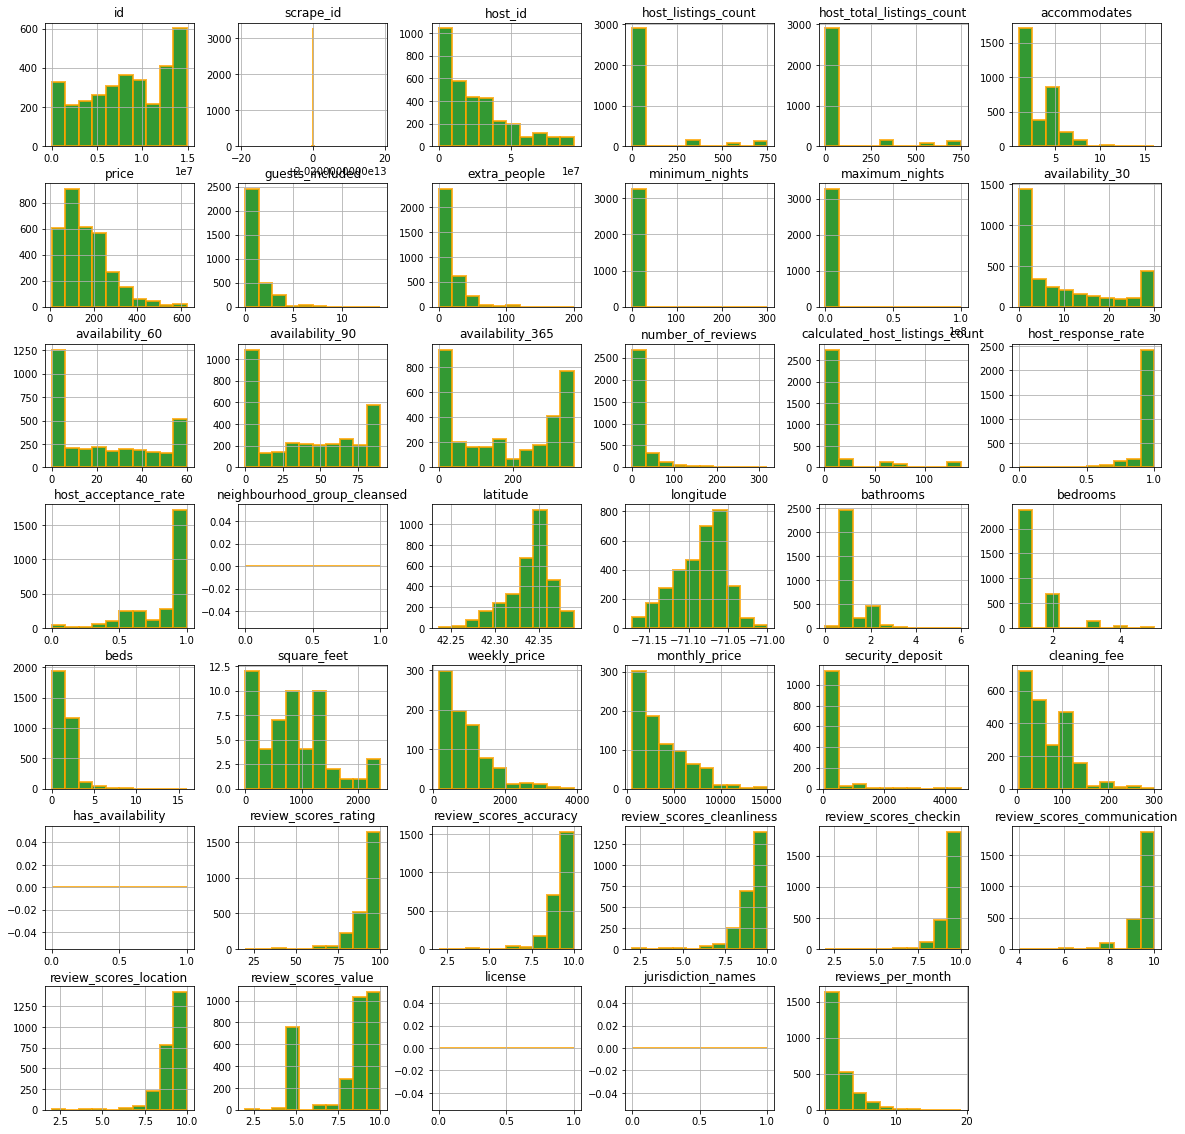

In [19]:
#  Creating a matrix of histograms to get an overview of what the spread is of each numerical variable.
#  df is the original df
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
df3.hist(figsize = (20,20), color = 'green', alpha = 0.8, label = 'Value', edgecolor = 'orange', linewidth = 2);

In [20]:
#  Creating a subset to only house the categorical values and excluding the numerical values.
#  df is the original df
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
df4 = df2[['listing_url', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities',
       'calendar_updated', 'calendar_last_scraped', 'first_review',
       'last_review', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'price']]

#  Using the head() method to get a look at what the data looks like.
df4.head()

listing_url  \
0  https://www.airbnb.com/rooms/12147973   
1   https://www.airbnb.com/rooms/3075044   
2      https://www.airbnb.com/rooms/6976   
3   https://www.airbnb.com/rooms/1436513   
4   https://www.airbnb.com/rooms/7651065   

                                            name  \
0                     Sunny Bungalow in the City   
1              Charming room in pet friendly apt   
2               Mexican Folk Art Haven in Boston   
3  Spacious Sunny Bedroom Suite in Historic Home   
4                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  \
0  Roslindale is quiet, convenient and friendly. ...   
1  The room is in Roslindale, a diverse and prima...   
2  The LOCATION: Roslindale is a safe and diverse...   
3  Roslindale is a lovely little neighborhood loc...   
4  I love the proximity to downtown, the neighbor...   

                                               notes  \
0                                                NaN   
1  If you don't have a US cell phone, you can tex...   
2  I am in a scenic part of Boston with a couple ...   
3  Please be mindful of the property as it is old...   
4  I have one roommate who lives on the lower lev...   

                                             transit  \
0  The bus stop is 2 blocks away, and frequent. B...   
1  Plenty of safe street parking. Bus stops a few...   
2  PUBLIC TRANSPORTATION: From the house, quick p...   
3  There are buses that stop right in front of th...   
4  From Logan Airport  and South Station you have...   

                                              access  \
0  You will have access to 2 bedrooms, a living r...   
1  Apt has one more bedroom (which I use) and lar...   
2  I am living in the apartment during your stay,...   
3  The basement has a washer dryer and gym area. ...   
4  You will have access to the front and side por...   

                                         interaction  \
0                                                NaN   
1  If I am at home, I am likely working in my hom...   
2  ABOUT ME: I'm a laid-back, friendly, unmarried...   
3  We do live in the house therefore might be som...   
4  I love my city and really enjoy sharing it wit...   

                                         house_rules  \
0  Clean up and treat the home the way you'd like...   
1  Pet friendly but please confirm with me if the...   
2  I encourage you to use my kitchen, cooking and...   
3                                             #NAME?   
4  Please no smoking in the house, porch or on th...   

                                       thumbnail_url  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...   
1  https://a1.muscache.com/im/pictures/39327812/d...   
2  https://a2.muscache.com/im/pictures/6ae8335d-9...   
3  https://a2.muscache.com/im/pictures/39764190-1...   
4  https://a1.musc

In [21]:
#  Just confirmig how many rows and coluns we have in the data set (rows, columns).
#  df is the original df
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
df2.shape

(3265, 95)

<AxesSubplot:xlabel='price'>

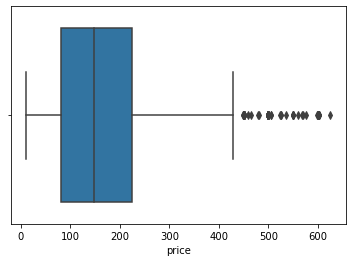

In [22]:
#  We are creating a box plot of the price column so we can see the spread of this variable.
#  df is the original df
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
sns.boxplot(data = df2, x = df2['price'])

In [23]:
#  This is just another way of highlighting outliers in the data set.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 is:", Q1)
print("Q3 is:", Q3)
print("IQR is:", IQR)
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR
print("The lower whisker value is:", Lower_Whisker, ',' , "The upper whisker value is:", Upper_Whisker)

Q1 is: 80.0
Q3 is: 225.0
IQR is: 145.0
The lower whisker value is: -137.5 , The upper whisker value is: 442.5


In [24]:
#  Creating a new data frame that house the rows where the values for the price is smaller than the upper whisker. The values that were greater than the upper whisker was dropped.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
df5 = df[df['price'] < Upper_Whisker]

In [25]:
#  Just confirmig how many rows and coluns we have in the data set (rows, columns).
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
df5.shape

(3185, 95)

In [26]:
#  Just confirmig what the data looks like now.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
df4.describe()

price
count  3265.000000
mean    166.617152
std     105.793346
min      10.000000
25%      80.000000
50%     147.000000
75%     225.000000
max     625.000000

In [27]:
#  This will list the columns with 100% missing values.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
no_nulls = display(set(df3.columns[df3.isnull().mean()==1]))

{'has_availability',
 'jurisdiction_names',
 'license',
 'neighbourhood_group_cleansed'}

In [28]:
#  This will drop the above columns from the data frame which contain 100% missing values.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
df3.drop(['has_availability', 'jurisdiction_names', 'license', 'neighbourhood_group_cleansed'], axis = 1)

id     scrape_id last_scraped   host_id  host_listings_count  \
0     12147973  2.020000e+13   2016/09/07  31303940                    1   
1      3075044  2.020000e+13   2016/09/07   2572247                    1   
2         6976  2.020000e+13   2016/09/07     16701                    1   
3      1436513  2.020000e+13   2016/09/07   6031442                    1   
4      7651065  2.020000e+13   2016/09/07  15396970                    1   
...        ...           ...          ...       ...                  ...   
3580   8373729  2.020000e+13   2016/09/07  19246369                   28   
3581  14844274  2.020000e+13   2016/09/07  37366454                    2   
3582  14585486  2.020000e+13   2016/09/07  11311919                    1   
3583  14603878  2.020000e+13   2016/09/07  74318064                    4   
3584  14504422  2.020000e+13   2016/09/07  42070843                   14   

      host_total_listings_count  accommodates  price  guests_included  \
0                             1             4    250                1   
1                             1             2     65                0   
2                             1             2     65                1   
3                             1             4     75                2   
4                             1             2     79                1   
...                         ...           ...    ...              ...   
3580                         28             3     69                1   
3581                          2             2    150                1   
3582                          1             4    198                1   
3583                          4             2     65                1   
3584                         14             2     65                1   

      extra_people  minimum_nights  maximum_nights  availability_30  \
0                0               2            1125                0   
1                0               2              15               26   
2               20               3              45               19   
3               25               1            1125                6   
4                0               2              31               13   
...            ...             ...             ...              ...   
3580            24               2            1125               21   
3581             0               3             365               29   
3582             0               3              12                0   
3583            30               1              13                5   
3584            30               1            1125               17   

      availability_60  availability_90  availability_365  number_of_reviews  \
0                   0                0                 0                  0   
1                  54               84               359                 36   
2                  46               61               319                 41   
3                  16               26                98                  1   
4                  34               59               334                 29   
...               ...              ...               ...                ...   
3580               51               81               356                  4   
3581               59               89               364                  0   
3582               15               40                40                  0   
3583                5                5               253                  2   
3584               45               75               165                  0   

      calculated_host_listings_count  host_response_rate  \
0                                  1                 NaN   
1                                  1                1.00   
2                                  1                1.00   
3                                  1                1.00   
4                                  1                1.00   
...                              ...                 ...   


In [29]:
#  This will list the columns which have more than 75% of their values missing.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
most_missing_cols = display(set(df3.columns[df3.isnull().mean() > 0.75]))

{'has_availability',
 'jurisdiction_names',
 'license',
 'neighbourhood_group_cleansed',
 'square_feet'}

In [30]:
#  This will drop the above columns from the data frame which contain 75% missing values - Also creates a new data frame with the dropped columns.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
df6 = df3.drop(['has_availability',
 'jurisdiction_names',
 'license',
 'monthly_price',
 'neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price'], axis = 1)

In [31]:
#  This will list the columns with 100% missing values - This looks at the categorical data frame.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
no_nulls = display(set(df4.columns[df4.isnull().mean() == 1]))

set()

In [32]:
#  This will drop columns from the data frame where the columns contain no uniques values - So all the values in the column are the same.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
df6.drop(columns=df6.columns[df6.nunique() == 1], inplace = True)

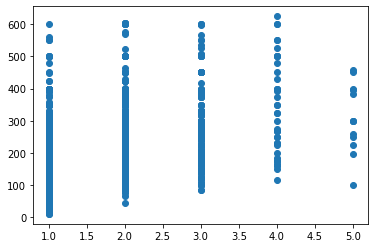

In [33]:
#  This is a scatterplot of number of bedrooms versus the price per night of the home.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
plt.scatter(df2["bedrooms"], df2["price"])

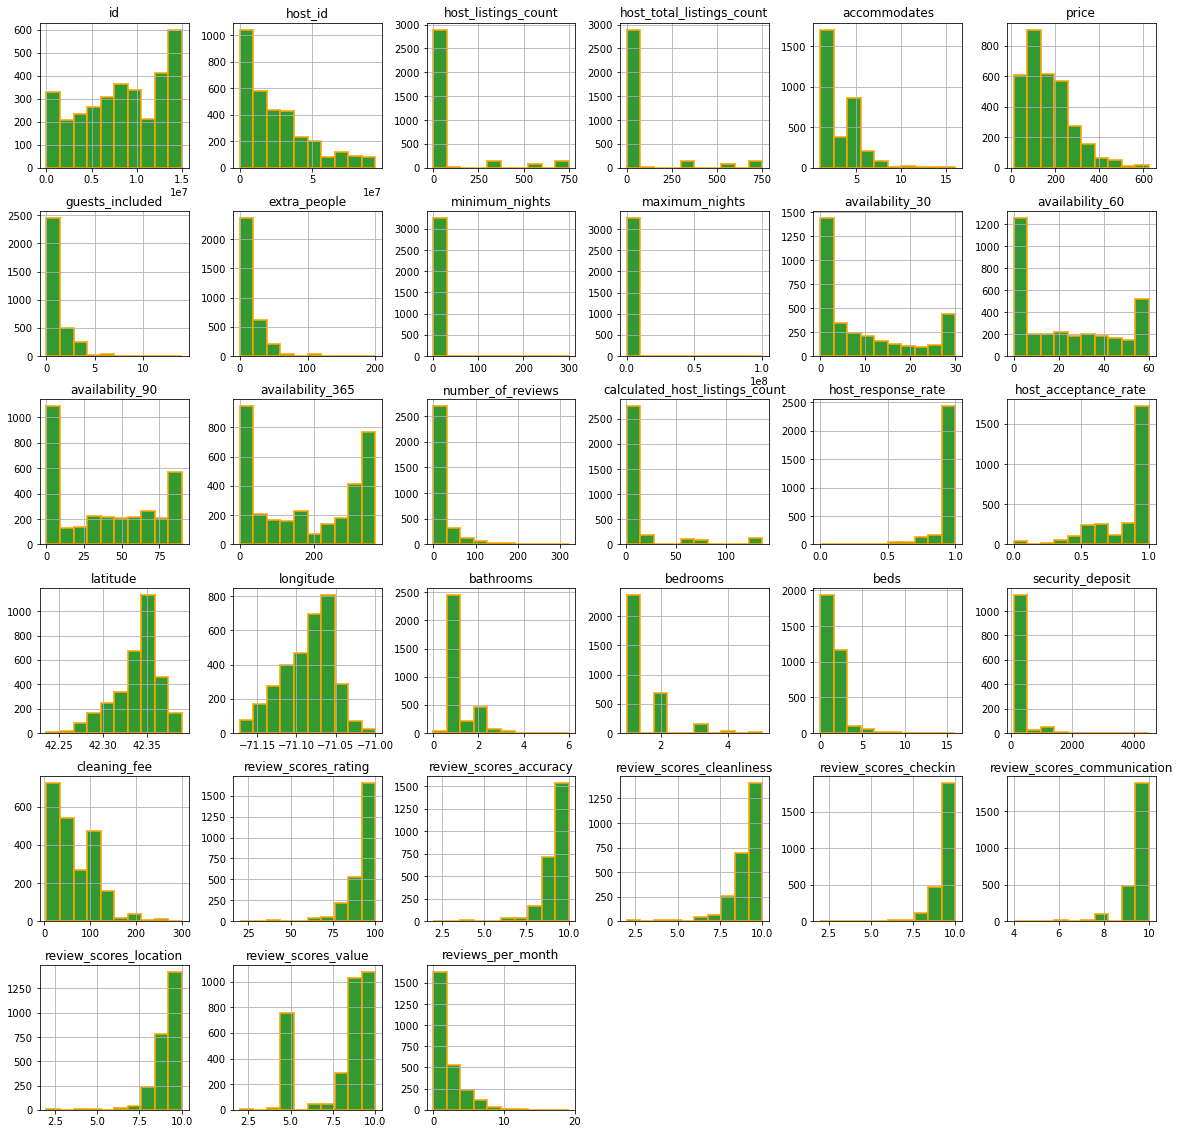

In [34]:
#  Creating a matrix of histograms (after we dropped some columns) to get an overview of what the spread is of each numerical variable.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
df6.hist(figsize = (20,20), color = 'green', alpha = 0.8, label = 'Value', edgecolor = 'orange', linewidth = 2);

In [35]:
#  Listing the number of listings in each neighborhood.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
print(df2.neighbourhood_cleansed.value_counts())

Jamaica Plain              334
Dorchester                 268
South End                  265
Fenway                     259
Allston                    243
Back Bay                   237
Brighton                   178
South Boston               168
Downtown                   152
Beacon Hill                149
East Boston                145
North End                  135
Roxbury                    133
Mission Hill               119
Charlestown                104
South Boston Waterfront     73
Chinatown                   67
Roslindale                  53
West End                    48
West Roxbury                45
Hyde Park                   31
Mattapan                    23
Bay Village                 23
Longwood Medical Area        8
Leather District             5
Name: neighbourhood_cleansed, dtype: int64


Text(0.5, 1.0, 'Correlation Matrix')

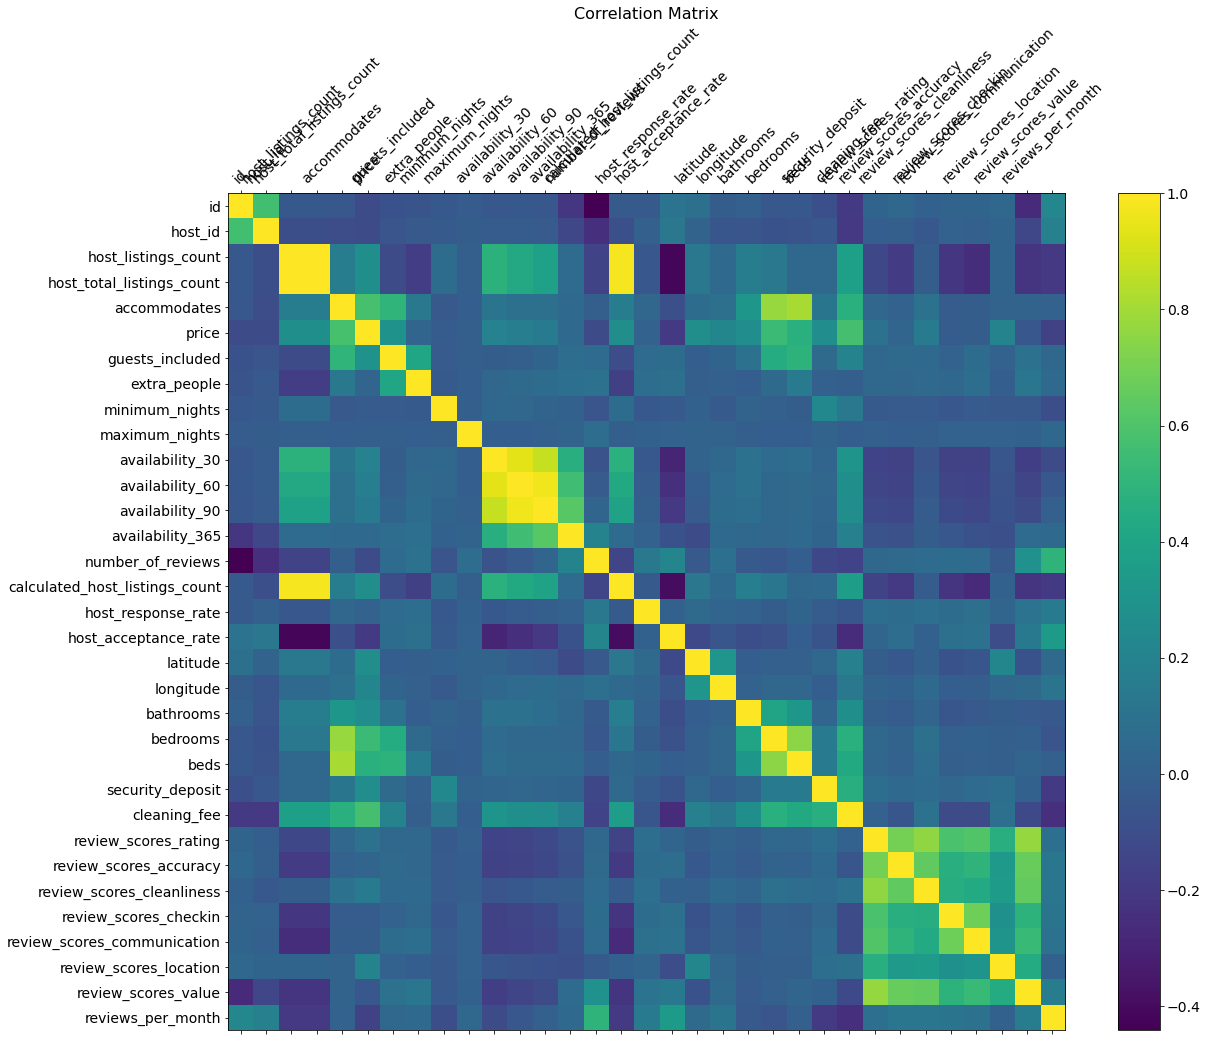

In [36]:
#  Creating a heatmap of the numerical values to see if any of the values are correlated.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
f = plt.figure(figsize = (19, 15))
plt.matshow(df6.corr(), fignum = f.number)
plt.xticks(range(df6.select_dtypes(['number']).shape[1]), df6.select_dtypes(['number']).columns, fontsize = 14, rotation = 45)
plt.yticks(range(df6.select_dtypes(['number']).shape[1]), df6.select_dtypes(['number']).columns, fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Correlation Matrix', fontsize = 16)

In [37]:
# Dropping values from the data frame where the bedrooms are not equal to 1.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
#  df7 all rows are dropped except where bedrooms = 1.
df7 = df[['id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'beds', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
          'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_value', 'calculated_host_listings_count',
         'scrape_id', 'host_response_rate', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'square_feet', 'weekly_price',
          'monthly_price', 'security_deposit', 'cleaning_fee', 'has_availability', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
          'review_scores_communication', 'review_scores_location', 'license', 'jurisdiction_names', 'reviews_per_month', 'listing_url', 'last_scraped', 'name', 'summary', 'space',
          'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url',
          'xl_picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
          'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
          'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'amenities', 'calendar_updated', 'calendar_last_scraped',
          'first_review', 'last_review', 'requires_license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']].copy()

df7.shape

df7.drop(df7.index[df7['bedrooms'] != 1], inplace = True)

Text(0.5, 1.0, 'Average Price per Listing in Boston for a one bedroom home')

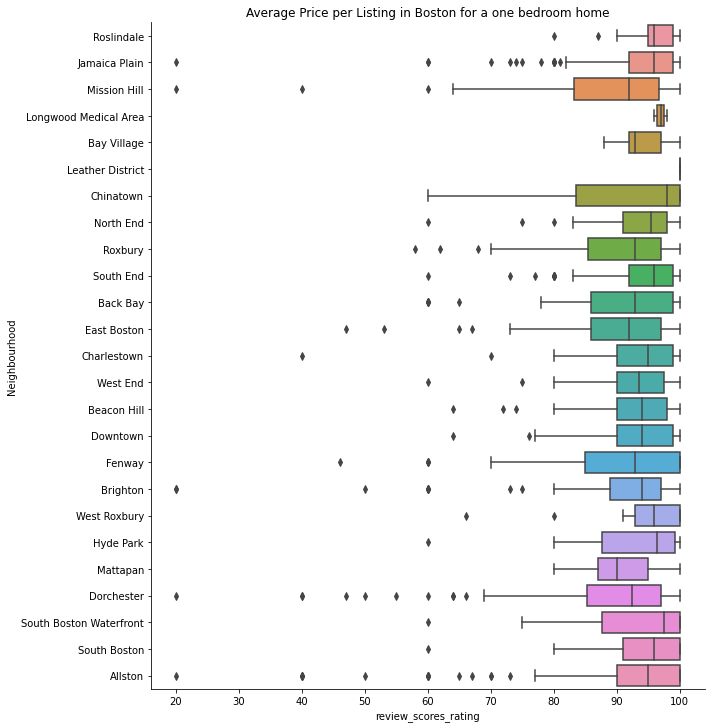

In [38]:
#  Creating a box and whiskers plot of the review score of a listing in each neighborhood.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
#  df7 all rows are dropped except where bedrooms = 1.
sns.catplot(x = "review_scores_rating", y = "neighbourhood_cleansed", kind = "box", data = df7, orient = "h", height = 10)
plt.xlabel('review_scores_rating')
plt.ylabel('Neighbourhood')
plt.title("Average Price per Listing in Boston for a one bedroom home")

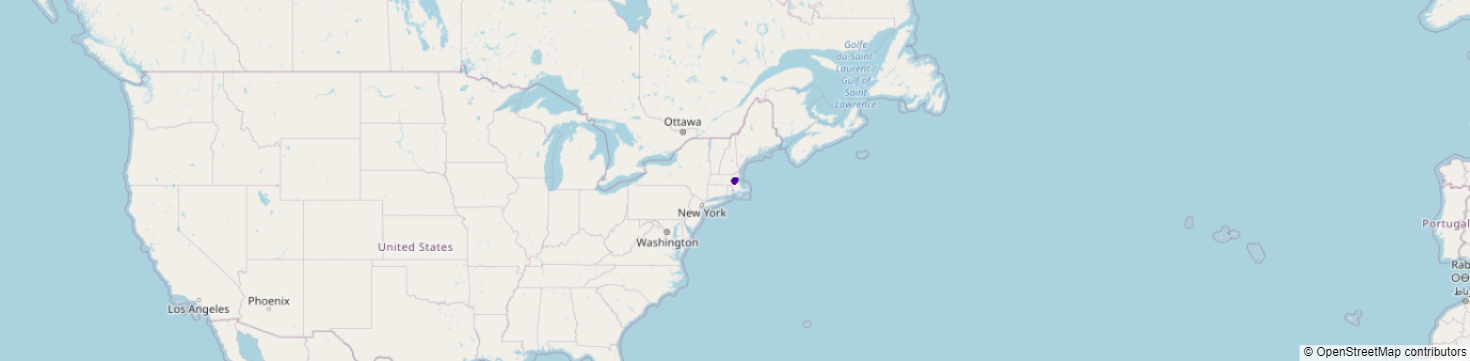

In [39]:
#  Creating a map to show visually where each listing lies (using the latitude and longitude values).
#  The color of the dots also show the price of the home where the more darker the dot, the cheaper the home is, and the lighter the dot, the more expensive the home is to rent.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
#  df7 all rows are dropped except where bedrooms = 1.
fig = px.scatter_mapbox(df2, lat = "latitude", lon = "longitude", hover_name = "neighbourhood_cleansed", hover_data = ["price", "zipcode"], color_discrete_sequence = [df2.price],
                        zoom = 3, height = 300,
                                )
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0, "t":0, "l":0, "b":0})
fig.show()

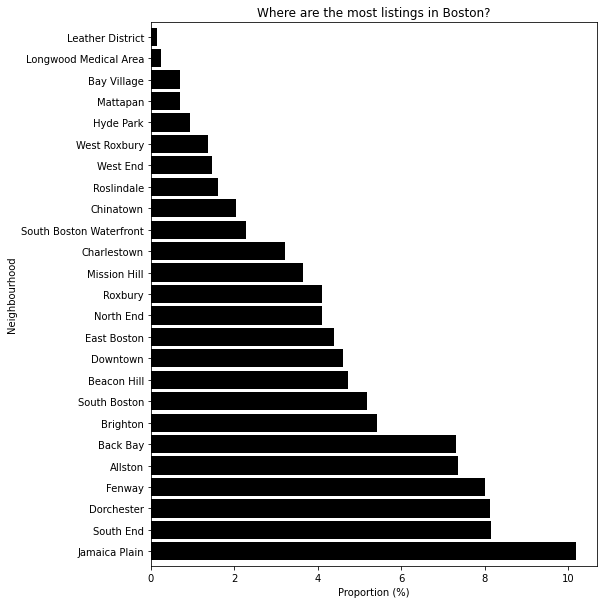

In [40]:
#  A horizontal bar chart will be displayed showing the proportion (%; what proportion of the total listigs in the data set lie in which location) of listings based on
#  location (neighborhoods in Boston, MA); The graph will have a title, x-axis title and y-axis title.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
#  df7 all rows are dropped except where bedrooms = 1.
listing_neighbourhood = df.neighbourhood_cleansed.value_counts()

((listing_neighbourhood/df.shape[0])*100).plot(kind = "barh", figsize = (8, 10), color = 'black', zorder = 2, width = 0.85)

# Add title and axis names
plt.xlabel('Proportion (%)')
plt.ylabel('Neighbourhood')
plt.title("Where are the most listings in Boston?")
plt.savefig('Proportion listings by location.png')

Text(0.5, 1.0, 'What property type is most popular?')

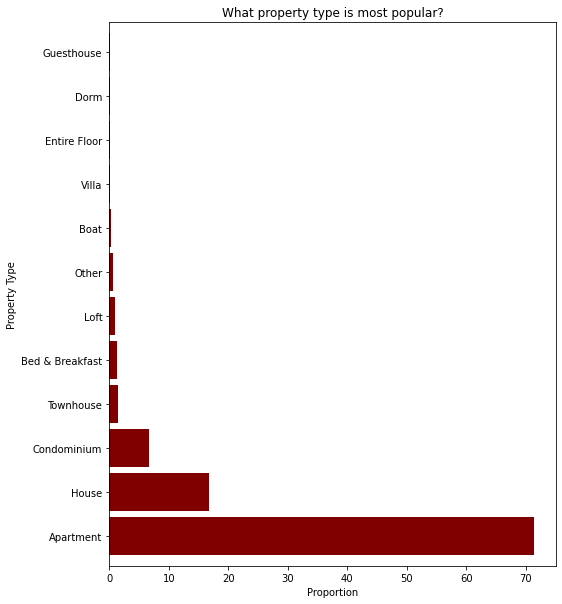

In [41]:
#  A horizontal bar chart will be displayed showing the proportion (%; what proportion of the total listigs in the data set) of listings based on
#  property type; The graph will have a title, x-axis title and y-axis title.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
#  df7 all rows are dropped except where bedrooms = 1.
listing_neighbourhood = df.property_type.value_counts()

((listing_neighbourhood/df.shape[0])*100).plot(kind = "barh", figsize = (8, 10), color = 'maroon', zorder = 2, width = 0.85);

# Add title and axis names
plt.xlabel('Proportion')
plt.ylabel('Property Type')
plt.title("What property type is most popular?")

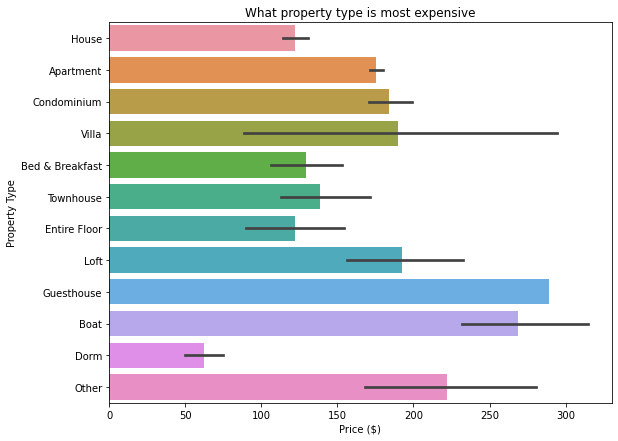

In [42]:
#  A horizontal bar chart will be displayed showing the price per listings based on property type;
#  The graph will have a title, x-axis title and y-axis title; The black overlay line on the bars is the error bars for the price.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
#  df7 all rows are dropped except where bedrooms = 1.
fig_dims = (9, 7)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(y = 'property_type', x = 'price', data = df2, orient = "h", ax = ax)
plt.xlabel('Price ($)')
plt.ylabel('Property Type')
plt.title("What property type is most expensive")
plt.show()

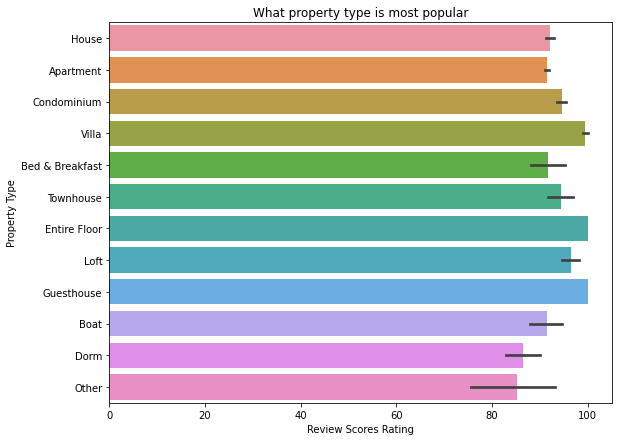

In [43]:
#  A horizontal bar chart will be displayed showing the average review score based on property type;
#  The graph will have a title, x-axis title and y-axis title; The black overlay line on the bars is the error bars for the review score.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
#  df7 all rows are dropped except where bedrooms = 1.
fig_dims = (9, 7)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(y = 'property_type', x = 'review_scores_rating', data = df2, orient = "h", ax = ax)
plt.xlabel('Review Scores Rating')
plt.ylabel('Property Type')
plt.title("What property type is most popular")
plt.show()

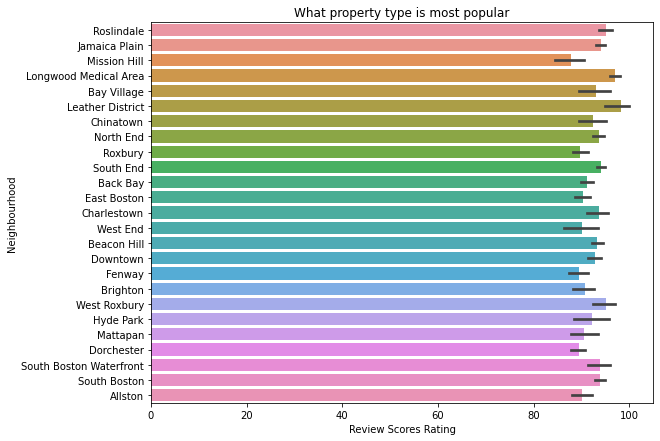

In [44]:
#  A horizontal bar chart will be displayed showing the average review score based on location;
#  The graph will have a title, x-axis title and y-axis title; The black overlay line on the bars is the error bars for the review score.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
#  df7 all rows are dropped except where bedrooms = 1.
fig_dims = (9, 7)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(y = 'neighbourhood_cleansed', x = 'review_scores_rating', data = df2, orient="h", ax = ax)
plt.xlabel('Review Scores Rating')
plt.ylabel('Neighbourhood')
plt.title("What property type is most popular")
plt.show()

In [45]:
#  Showing what the price of each listing is based on home many bedrooms they are offering.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
#  df7 all rows are dropped except where bedrooms = 1.
df2.groupby(by = "bedrooms")["price"].mean()

bedrooms
1.0    130.261090
2.0    251.367733
3.0    289.462585
4.0    350.200000
5.0    308.846154
Name: price, dtype: float64

In [46]:
#  Making sure the rows with zero bedrooms are dropped.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
#  df7 all rows are dropped except where bedrooms = 1.
df2[df2['bedrooms'] == 0]['price'].mean()

nan

In [47]:
#  Showing what the price difference is between the number of bedrooms offered.
#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
#  df7 all rows are dropped except where bedrooms = 1.
print("The price for 1 bedroom:",(df2[df2['bedrooms'] == 1]['price'].mean()))
print("The extra for 1 more bedroom:",(df2[df2['bedrooms'] == 2]['price'].mean()-df2[df2['bedrooms'] == 1]['price'].mean()))
print("The extra for 2 more bedrooms:",(df2[df2['bedrooms'] == 3]['price'].mean()-df2[df2['bedrooms'] == 1]['price'].mean()))
print("The extra for 3 more bedrooms:",(df2[df2['bedrooms'] == 4]['price'].mean()-df2[df2['bedrooms'] == 1]['price'].mean()))
print("The extra for 4 more bedrooms:",(df2[df2['bedrooms'] == 5]['price'].mean()-df2[df2['bedrooms'] == 1]['price'].mean()))
print("The price difference from 1 to 2 bedrooms:",(df2[df2['bedrooms'] == 2]['price'].mean()-df2[df2['bedrooms'] == 1]['price'].mean()))
print("The price difference from 2 to 3 bedrooms:",(df2[df2['bedrooms'] == 3]['price'].mean()-df2[df2['bedrooms'] == 2]['price'].mean()))
print("TThe price difference from 3 to 4 bedrooms:",(df2[df2['bedrooms'] == 4]['price'].mean()-df2[df2['bedrooms'] == 3]['price'].mean()))
print("The price difference from 4 to 5 bedrooms:",(df2[df2['bedrooms'] == 5]['price'].mean()-df2[df2['bedrooms'] == 4]['price'].mean()))

The price for 1 bedroom: 130.26108998732573
The extra for 1 more bedroom: 121.10664257081379
The extra for 2 more bedrooms: 159.20149504668788
The extra for 3 more bedrooms: 219.93891001267426
The extra for 4 more bedrooms: 178.58506385882814
The price difference from 1 to 2 bedrooms: 121.10664257081379
The price difference from 2 to 3 bedrooms: 38.09485247587409
TThe price difference from 3 to 4 bedrooms: 60.737414965986375
The price difference from 4 to 5 bedrooms: -41.35384615384612


In [48]:
#  Creating a new data frame for data to fit the model

#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
#  df7 all rows are dropped except where bedrooms = 1
#  df8 only contain certain columns, the rest have been removed

df8 = df2[['accommodates', 'beds', 'price', 'availability_365', 'review_scores_value', 'bathrooms', 'bedrooms', 'neighbourhood_cleansed']].copy()

df8.shape

(3265, 8)

In [49]:
#  Dropping values where beds = 0.

#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
#  df7 all rows are dropped except where bedrooms = 1
#  df8 only contain certain columns, the rest have been removed

#  Dropping the rows from the data frame where the values for the bedroom is equal to zero.
df8.drop(df8.index[df8['beds'] == 0], inplace = True)

In [50]:
#  Seeing which colums contain zero's.

#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
#  df7 all rows are dropped except where bedrooms = 1
#  df8 only contain certain columns, the rest have been removed

df8.isna().sum()

accommodates               0
beds                       0
price                      0
availability_365           0
review_scores_value        0
bathrooms                  0
bedrooms                  10
neighbourhood_cleansed     0
dtype: int64

In [51]:
#  Imputing missing values with values from another column.

#  df is the original df (bedrooms = 0 is dropped)
#  df1 rows were dropped where bedroom != 3
#  df2 has dropped outliers based on z-score
#  df3 is only the numerical values with outliers dropped
#  df4 is only the categorical values with the outliers dropped
#  df5 is outliers dropped with Q1/Q3/IQR
#  df6 is the numerical values with dropped missing values
#  df7 all rows are dropped except where bedrooms = 1
#  df8 only contain certain columns, the rest have been removed

df8.bedrooms.fillna(df8.beds, inplace=True)

In [52]:
#  Seeing which colums contain zero's.

df8.isna().sum()

accommodates              0
beds                      0
price                     0
availability_365          0
review_scores_value       0
bathrooms                 0
bedrooms                  0
neighbourhood_cleansed    0
dtype: int64

In [53]:
#  Separate the other attributes from the predicting attribute

remove0 = ['price','availability_365','review_scores_value', 'beds']
x= df8[df8.columns.difference(remove0)]
#x = df1.drop('price', axis=1)

#  Separte the predicting attribute into Y for model training 

remove = ['neighbourhood_cleansed', 'accommodates', 'bathrooms', 'beds', 'availability_365', 'review_scores_value', 'bedrooms']
y= df8[df8.columns.difference(remove)]

x

accommodates  bathrooms  bedrooms neighbourhood_cleansed
0                4        1.5       2.0             Roslindale
1                2        1.0       1.0             Roslindale
2                2        1.0       1.0             Roslindale
3                4        1.0       1.0             Roslindale
4                2        1.5       1.0             Roslindale
...            ...        ...       ...                    ...
3580             3        1.0       1.0            Charlestown
3581             2        1.0       1.0                Allston
3582             4        1.0       1.0            Charlestown
3583             2        1.0       1.0            Charlestown
3584             2        1.0       1.0            Charlestown

[3255 rows x 4 columns]

In [54]:
# Handle categorical variable
neighbourhood=pd.get_dummies(x,drop_first=True)

# Dropping extra column
x= x.drop('neighbourhood_cleansed',axis=1)

# Concatation of independent variables and new cateorical variable.
x=pd.concat([x,neighbourhood],axis=1)

x

accommodates  bathrooms  bedrooms  accommodates  bathrooms  bedrooms  \
0                4        1.5       2.0             4        1.5       2.0   
1                2        1.0       1.0             2        1.0       1.0   
2                2        1.0       1.0             2        1.0       1.0   
3                4        1.0       1.0             4        1.0       1.0   
4                2        1.5       1.0             2        1.5       1.0   
...            ...        ...       ...           ...        ...       ...   
3580             3        1.0       1.0             3        1.0       1.0   
3581             2        1.0       1.0             2        1.0       1.0   
3582             4        1.0       1.0             4        1.0       1.0   
3583             2        1.0       1.0             2        1.0       1.0   
3584             2        1.0       1.0             2        1.0       1.0   

      neighbourhood_cleansed_Back Bay  neighbourhood_cleansed_Bay Village  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   
...                               ...                                 ...   
3580                                0                                   0   
3581                                0                                   0   
3582                                0                                   0   
3583                                0                                   0   
3584                                0                                   0   

      neighbourhood_cleansed_Beacon Hill  neighbourhood_cleansed_Brighton  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   
3                                      0                                0   
4                                      0                                0   
...                                  ...                              ...   
3580                                   0                                0   
3581                                   0                                0   
3582                                   0                                0   
3583                                   0                                0   
3584                                   0                                0   

      neighbourhood_cleansed_Charlestown  neighbourhood_cleansed_Chinatown  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   
...                                  ...                               ...   
3580                                   1                                 0   
3581                                   0                                 0   
3582                                   1                                 0   
3583                                   1                                 0   
3584                                   1                                 0   

      neighbourhood_cleansed_Dorchester  neighbourhood_cleansed_Downtown  \
0                                     0                                0   
1                                     0                                0   
2                                     0               

In [55]:
x.shape

# splitting the data
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

(3255, 30)

In [56]:
# Splitting the data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [57]:
# Creating an object of LinearRegression class.
LR = LinearRegression()

# Fitting the training data
modelY=LR.fit(x_train,y_train)

In [58]:
# Using the model to predict the value of the homes.
y_prediction =  LR.predict(x_test)
y_prediction

array([[140.14247736],
       [ 78.44527413],
       [ 88.97030915],
       [241.69531668],
       [177.35125279],
       [210.89957534],
       [294.95856732],
       [321.2001081 ],
       [153.96066663],
       [ 64.46254166],
       [192.05907092],
       [266.84937775],
       [ 89.64536126],
       [206.76688906],
       [428.34554535],
       [187.40077278],
       [300.3977003 ],
       [210.89957534],
       [183.6752926 ],
       [178.66684727],
       [212.06685349],
       [177.21208424],
       [182.65121722],
       [164.71013556],
       [183.6752926 ],
       [ 97.96273155],
       [ 66.43160256],
       [339.8909352 ],
       [128.42872786],
       [246.56325808],
       [143.27731838],
       [ 50.62252215],
       [206.76688906],
       [280.64503527],
       [162.04430824],
       [153.55740212],
       [119.06099753],
       [ 93.15309226],
       [104.3531794 ],
       [177.35125279],
       [240.31521161],
       [202.28634687],
       [168.96747446],
       [330

In [59]:
#  Now, we have to compare the y_prediction values with the original values because we have to calculate the accuracy of our model, which was implemented by a concept
#  called r2_score.

# Importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.580055110034641
mean_sqrd_error is== 4285.022122446739
root_mean_squared error of is== 65.46008037305438


In [60]:
modelY.score(x, y)

0.5687191480339575

In [61]:
for col in x.columns:
    print(col)

accommodates
bathrooms
bedrooms
accommodates
bathrooms
bedrooms
neighbourhood_cleansed_Back Bay
neighbourhood_cleansed_Bay Village
neighbourhood_cleansed_Beacon Hill
neighbourhood_cleansed_Brighton
neighbourhood_cleansed_Charlestown
neighbourhood_cleansed_Chinatown
neighbourhood_cleansed_Dorchester
neighbourhood_cleansed_Downtown
neighbourhood_cleansed_East Boston
neighbourhood_cleansed_Fenway
neighbourhood_cleansed_Hyde Park
neighbourhood_cleansed_Jamaica Plain
neighbourhood_cleansed_Leather District
neighbourhood_cleansed_Longwood Medical Area
neighbourhood_cleansed_Mattapan
neighbourhood_cleansed_Mission Hill
neighbourhood_cleansed_North End
neighbourhood_cleansed_Roslindale
neighbourhood_cleansed_Roxbury
neighbourhood_cleansed_South Boston
neighbourhood_cleansed_South Boston Waterfront
neighbourhood_cleansed_South End
neighbourhood_cleansed_West End
neighbourhood_cleansed_West Roxbury


In [62]:
#  Giving the coefficients for each variable in the model.
modelY.coef_

array([[  7.35390907,   5.43913299,  24.60211136,   7.35390907,
          5.43913299,  24.60211136, 124.80929876, 122.00554213,
         95.51742583,   2.88003257,  53.46484138,  90.3488156 ,
        -21.62773491, 116.19607029,   3.55508469,  82.87719789,
        -23.08053229,   7.06281569, 149.13022744,  55.16003593,
        -20.75993629,   7.98281909,  63.16093443, -32.08146359,
         11.87245497,  42.33845128, 127.05045421,  91.26097622,
         66.10691514, -15.82912185]])

In [63]:
#  Giving the intercept of the model.
modelY.intercept_

array([-3.40784839])

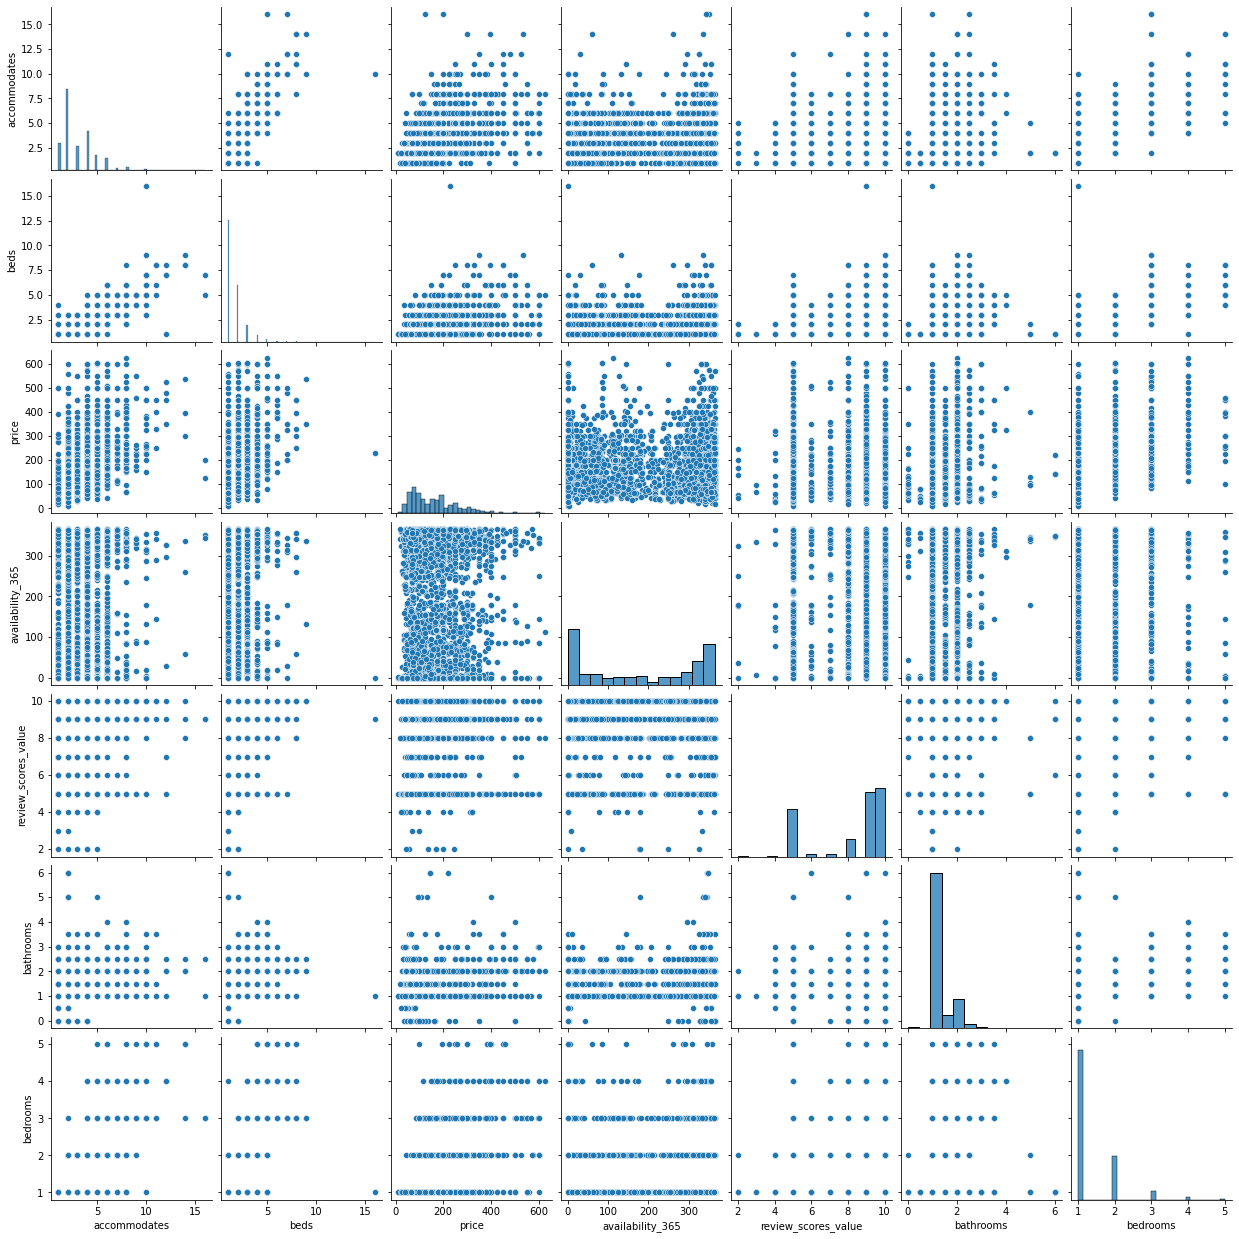

In [64]:
#  Creating a scatterplot matrix for the model variables.
sns.pairplot(df8)

In [65]:
#  Creating a data frame so we can add the predicted values to the actual values to compare.
y_test['predicted_values'] = y_prediction
df_out = pd.merge(y,y_test[['predicted_values']],how = 'left',left_index = True, right_index = True)
df_out.head()

C:\Users\YVTONDER\AppData\Local\Temp/ipykernel_10852/678589061.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



price  predicted_values
0    250        138.067805
1     65               NaN
2     65               NaN
3     75               NaN
4     79               NaN

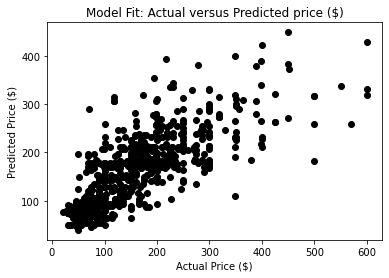

In [66]:
#  Drawing a scatterplot of the actual versus the predicted prices.
plt.scatter(df_out["price"], df_out["predicted_values"], color = "black")
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title("Model Fit: Actual versus Predicted price ($)");